# Q.1) Implement a KNN model to classify the animals in to categorie?
 ## use zoo.csv

In [2]:
import pandas as pd
import numpy as np

In [34]:
#read the data
zoo_data=pd.read_csv('zoo.csv')
zoo_data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## EDA

In [6]:
zoo_data.shape

(101, 18)

In [8]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [11]:
zoo_data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [18]:
#unique animals
zoo_data['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [20]:
#types of the animals
zoo_data['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

## #counts of animals acoording to their types(our output varibale)

In [28]:
#counts of animals acoording to their types(our output varibale)
zoo_data.groupby('type')[['animal name']].count()

,animal name
type,
1,41
2,20
3,5
4,13
5,4
6,8
7,10


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


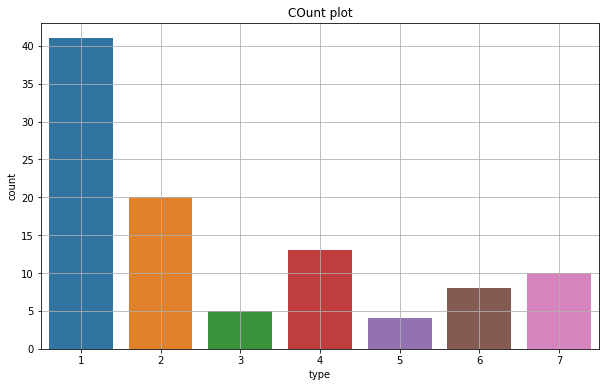

In [30]:
#count plot 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(zoo_data['type'])
plt.title('COunt plot')
plt.grid(True)
plt.show()

# Data Preparation

In [35]:
#drop unnecessary columns
zoo_data=zoo_data.drop('animal name', axis=1)


In [37]:
zoo_data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# spliting the data

In [41]:
from sklearn.model_selection import train_test_split

In [101]:
x=zoo_data.drop('type', axis=1)
y=zoo_data[['type']]

In [157]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=10)

In [103]:
print('X_train_shape :',X_train.shape , '\ny_train_shape :',y_train.shape)
print('X_test_shape :',X_test.shape , '\ny_test_shape :',y_test.shape)

X_train_shape : (80, 16) 
y_train_shape : (80, 1)
X_test_shape : (21, 16) 
y_test_shape : (21, 1)


In [104]:
y_test

,type
79,2
63,1
85,7
39,6
38,4
3,1
19,1
66,1
90,3
14,7


# Model Building Or Training

In [48]:
#import KNN libaraies
from sklearn.neighbors import KNeighborsClassifier

### Grid Search for Hyperperameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [53]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [58]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [60]:
print(grid.best_score_)
print(grid.best_params_)


0.97
{'n_neighbors': 1}


### Visualizing the CV results

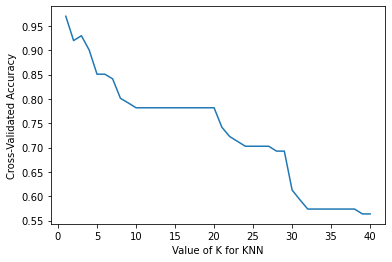

In [65]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## from above observation we find the best value for K is 1.

# now, implementing the KNN with K value 1.

In [68]:
knn = KNeighborsClassifier(n_neighbors = 1, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

## Prediction on the test set

In [132]:
y_pred = knn.predict(X_test)

In [73]:
#Print the predicted values
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [2 1 7 6 4 1 1 1 3 5 2 4 1 6 4 1 5 2 1 4 7]


## Evaluating the Model

In [160]:
#Confusion matrix and classification report
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [167]:
# accuracy score
accuracy_score(y_test, y_pred)

0.9523809523809523

Text(33.0, 0.5, 'True')

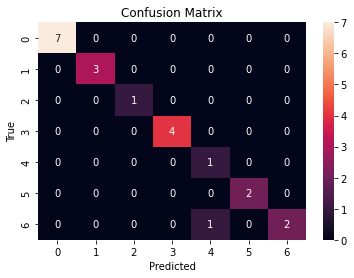

In [164]:
#Confusion matrix 
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

In [166]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         4
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      0.67      0.80         3

    accuracy                           0.95        21
   macro avg       0.93      0.95      0.92        21
weighted avg       0.98      0.95      0.96        21

